In [0]:
##Generative Adversarial Network

In [0]:
#create dataloaders
from random import randint as ri
import torch as torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')

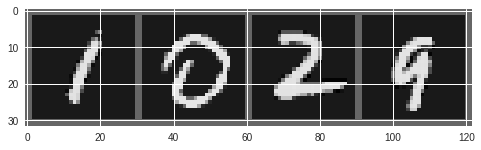

       one       zero        two       nine


In [3]:
#check if data is loaded properly
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = abs(img / 2 + 0.4)    # unnormalize
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('      %4s' % classes[labels[j]] for j in range(4)))

In [0]:
#Discriminator model 
import torch.nn as nn
import torch.nn.functional as F


class Discriminator(nn.Module):
    def __init__(self):
        
        super(Discriminator, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(1, 3, 5),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(3, 6, 5),
            nn.LeakyReLU(0.2),
            nn.MaxPool2d(2, 2),
            
        )
        self.sig = nn.Sigmoid()
        
        self.fc1 = nn.Linear( 24*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)         

    def forward(self, x):
        x = self.block(x);
        x = x.view(-1,  24*4)
        x = F.leaky_relu(self.fc1(x),0.2);
        x = F.leaky_relu(self.fc2(x),0.2);
        x = self.fc3(x);
        x = self.sig(x);
        #_, predicted = torch.max(x,1);
        return x


In [0]:
#Generator model 


class Generator(nn.Module):
    def __init__(self):
        
        super(Generator, self).__init__()
        
        self.Linear = nn.Linear(100, 4*100*256)
        
        self.block = nn.Sequential(
            nn.ConvTranspose2d(in_channels = 256, out_channels = 128, kernel_size = (1), stride= 1),      #Apply a convolutional block
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels = 128, out_channels = 64, kernel_size = (1), stride= 1),      #Apply a convolutional block
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels = 64, out_channels = 1, kernel_size = 10, stride= 2),
            nn.Tanh(),
        )
        
    def forward(self, x):
        x = self.Linear(x);
        x = torch.reshape(x,(4,256,10,10))
        x = self.block(x);
        
        return x

In [0]:
#Create an instance of the generator and discriminator
gen = Generator()
dis = Discriminator()
gen = gen.cuda()
dis = dis.cuda()


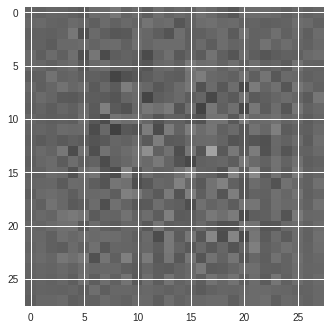

torch.Size([4, 1, 28, 28])

In [7]:
#Test generator output
noise = torch.randn(100)
a = gen(noise.cuda())
imshow(torchvision.utils.make_grid(a[0].cpu()))
a.shape
#dis(a).shape

In [0]:
#create optimization function and loss function for both generator and discriminator
import torch.optim as optim

criteriondis = nn.MSELoss()
criteriongen = nn.MSELoss()
gen_optimizer = optim.Adam(gen.parameters(), lr=0.0002, betas = (0.5,0.999))
dis_optimizer = optim.Adam(dis.parameters(), lr = 0.0002, betas = (0.5,0.999))

Epoch: 1 | No of images:  2000 | real_loss: 0.061 | fake_loss: 0.159 | gen_loss: 0.571


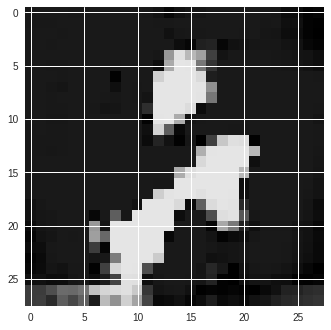

Epoch: 1 | No of images:  4000 | real_loss: 0.076 | fake_loss: 0.165 | gen_loss: 0.599


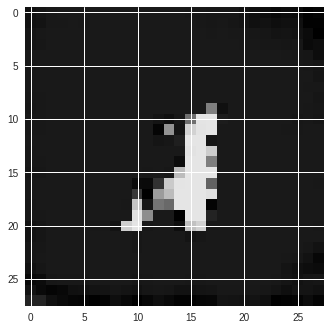

Epoch: 1 | No of images:  6000 | real_loss: 0.068 | fake_loss: 0.152 | gen_loss: 0.624


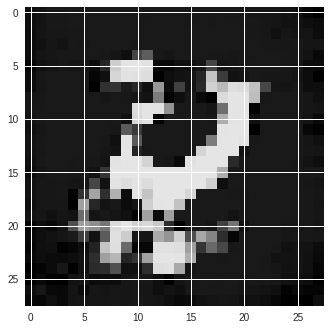

Epoch: 1 | No of images:  8000 | real_loss: 0.074 | fake_loss: 0.162 | gen_loss: 0.590


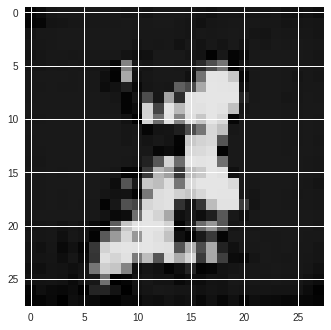

Epoch: 1 | No of images: 10000 | real_loss: 0.079 | fake_loss: 0.166 | gen_loss: 0.547


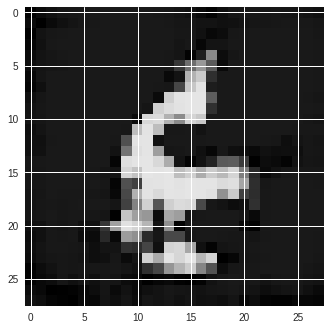

Epoch: 1 | No of images: 12000 | real_loss: 0.082 | fake_loss: 0.166 | gen_loss: 0.529


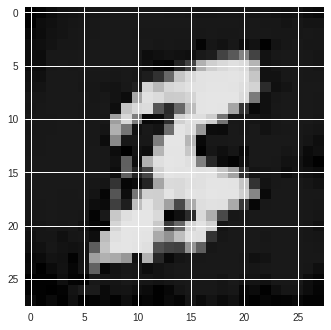

Epoch: 1 | No of images: 14000 | real_loss: 0.081 | fake_loss: 0.159 | gen_loss: 0.549


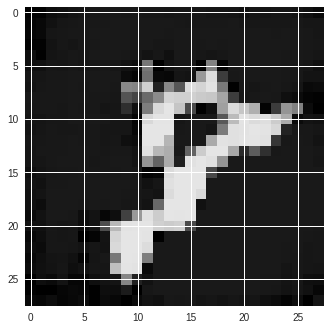

Epoch: 2 | No of images:  2000 | real_loss: 0.082 | fake_loss: 0.153 | gen_loss: 0.547


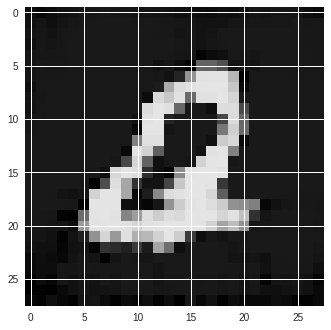

Epoch: 2 | No of images:  4000 | real_loss: 0.083 | fake_loss: 0.156 | gen_loss: 0.549


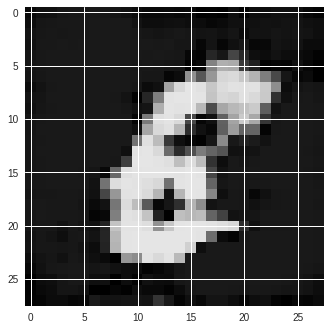

Epoch: 2 | No of images:  6000 | real_loss: 0.083 | fake_loss: 0.150 | gen_loss: 0.552


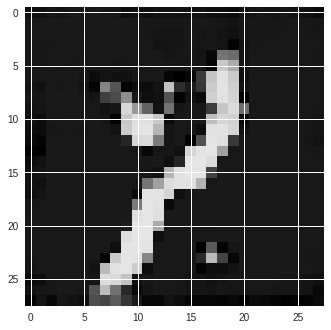

Epoch: 2 | No of images:  8000 | real_loss: 0.083 | fake_loss: 0.150 | gen_loss: 0.553


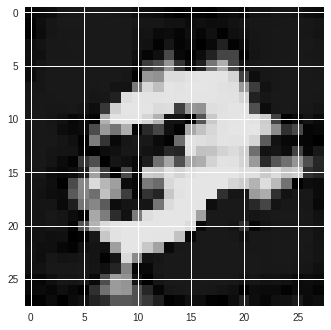

Epoch: 2 | No of images: 10000 | real_loss: 0.084 | fake_loss: 0.150 | gen_loss: 0.551


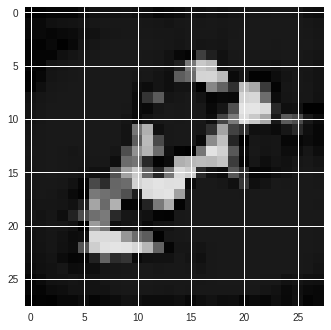

Epoch: 2 | No of images: 12000 | real_loss: 0.085 | fake_loss: 0.152 | gen_loss: 0.542


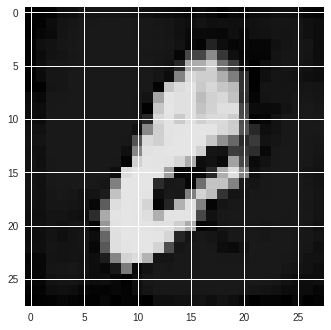

Epoch: 2 | No of images: 14000 | real_loss: 0.085 | fake_loss: 0.153 | gen_loss: 0.544


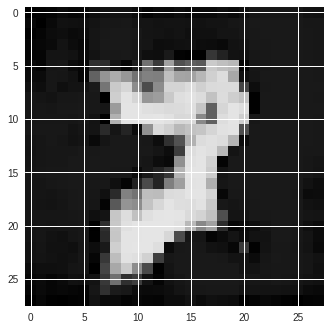

Epoch: 3 | No of images:  2000 | real_loss: 0.086 | fake_loss: 0.156 | gen_loss: 0.536


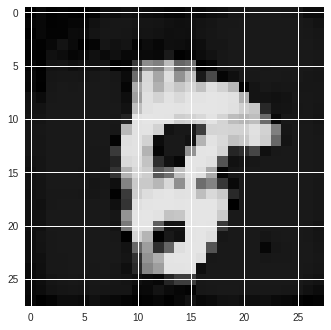

Epoch: 3 | No of images:  4000 | real_loss: 0.086 | fake_loss: 0.153 | gen_loss: 0.532


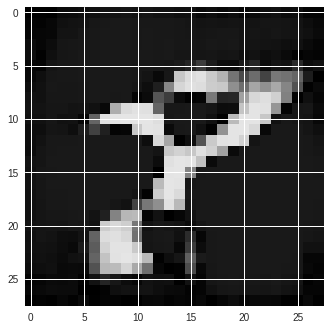

Epoch: 3 | No of images:  6000 | real_loss: 0.089 | fake_loss: 0.156 | gen_loss: 0.532


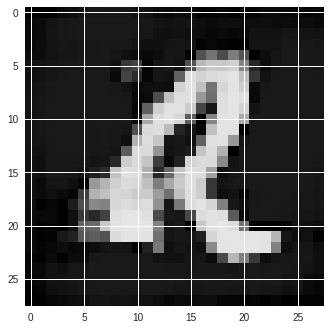

Epoch: 3 | No of images:  8000 | real_loss: 0.088 | fake_loss: 0.159 | gen_loss: 0.529


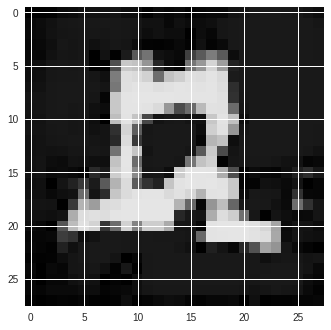

Epoch: 3 | No of images: 10000 | real_loss: 0.086 | fake_loss: 0.152 | gen_loss: 0.537


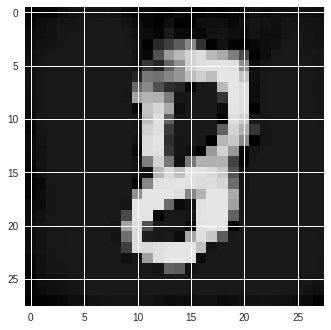

Epoch: 3 | No of images: 12000 | real_loss: 0.088 | fake_loss: 0.151 | gen_loss: 0.534


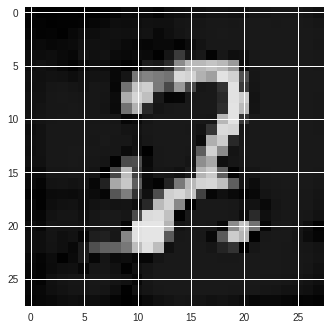

Epoch: 3 | No of images: 14000 | real_loss: 0.090 | fake_loss: 0.152 | gen_loss: 0.530


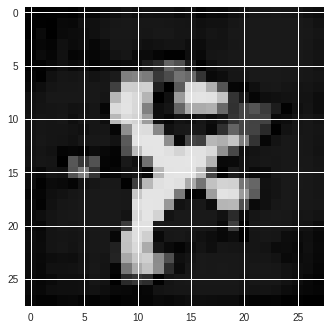

Epoch: 4 | No of images:  2000 | real_loss: 0.088 | fake_loss: 0.150 | gen_loss: 0.532


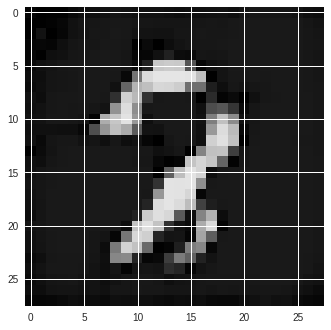

Epoch: 4 | No of images:  4000 | real_loss: 0.088 | fake_loss: 0.148 | gen_loss: 0.534


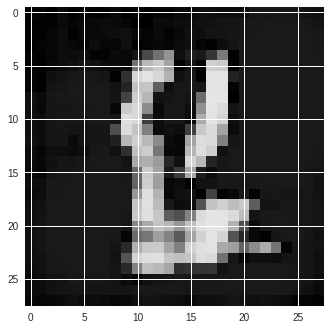

Epoch: 4 | No of images:  6000 | real_loss: 0.091 | fake_loss: 0.150 | gen_loss: 0.526


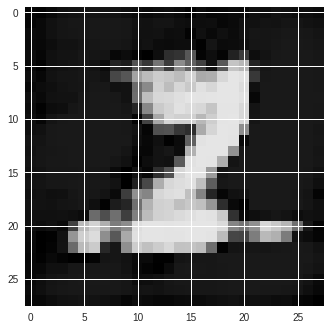

Epoch: 4 | No of images:  8000 | real_loss: 0.089 | fake_loss: 0.148 | gen_loss: 0.526


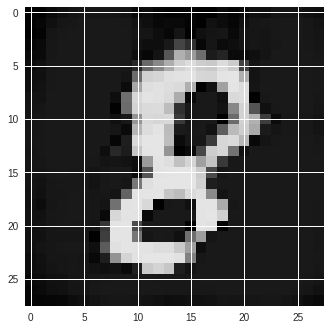

Epoch: 4 | No of images: 10000 | real_loss: 0.089 | fake_loss: 0.145 | gen_loss: 0.531


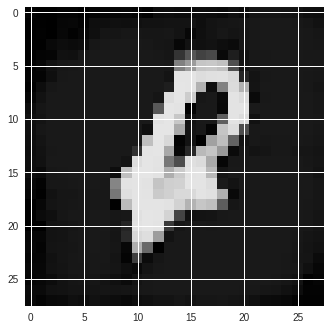

Epoch: 4 | No of images: 12000 | real_loss: 0.092 | fake_loss: 0.154 | gen_loss: 0.515


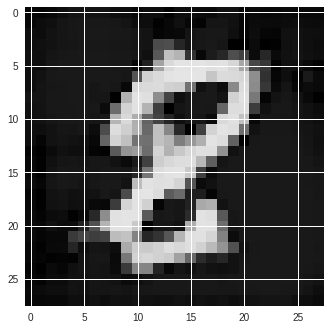

Epoch: 4 | No of images: 14000 | real_loss: 0.092 | fake_loss: 0.145 | gen_loss: 0.521


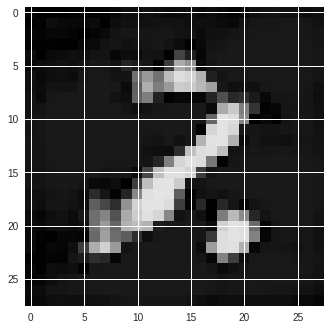

Epoch: 5 | No of images:  2000 | real_loss: 0.092 | fake_loss: 0.148 | gen_loss: 0.519


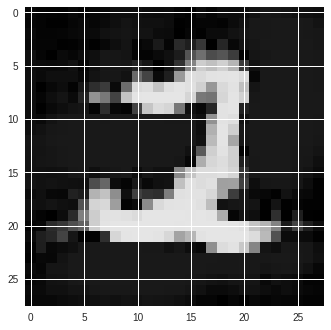

Epoch: 5 | No of images:  4000 | real_loss: 0.091 | fake_loss: 0.147 | gen_loss: 0.517


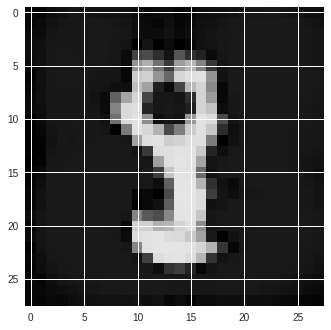

Epoch: 5 | No of images:  6000 | real_loss: 0.092 | fake_loss: 0.142 | gen_loss: 0.525


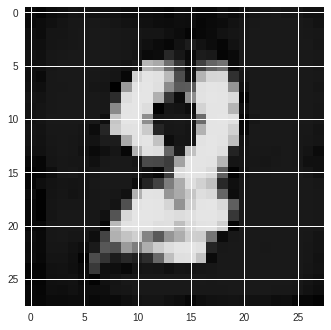

Epoch: 5 | No of images:  8000 | real_loss: 0.090 | fake_loss: 0.143 | gen_loss: 0.521


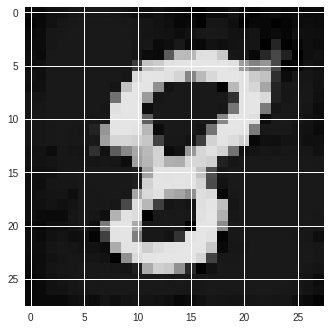

Epoch: 5 | No of images: 10000 | real_loss: 0.092 | fake_loss: 0.141 | gen_loss: 0.524


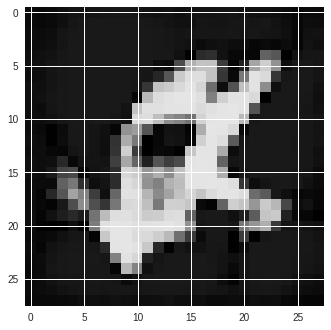

Epoch: 5 | No of images: 12000 | real_loss: 0.093 | fake_loss: 0.143 | gen_loss: 0.521


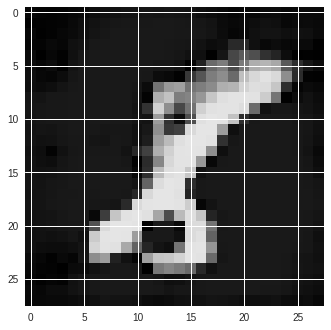

Epoch: 5 | No of images: 14000 | real_loss: 0.092 | fake_loss: 0.142 | gen_loss: 0.515


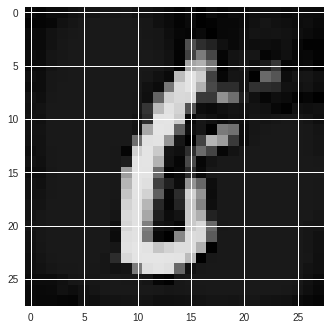

Finished Training


In [9]:
#Train the GAN
for epoch in range(5):

    running_loss_real = 0.0
    running_loss_fake = 0.0
    running_loss_gen  = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        real_images, real_labels = data
        real_images = real_images.cuda()
        gen_ip = torch.randn(100)
        gen_ip = gen_ip.cuda()


        # zero the parameter gradients
        gen_optimizer.zero_grad()
        dis_optimizer.zero_grad()

        # forward + backward + optimize
        gen_op = gen(gen_ip)
        dis_op = dis(real_images)
        
        ones = torch.ones((dis_op.shape), dtype = torch.int64)
        ones = ones.cuda()
        zeros = torch.zeros(dis_op.shape, dtype = torch.int64)
        zeros = zeros.cuda()
        
        #Minimize discriminator loss against ones
        real_output = dis(real_images)
        real_loss = criteriondis(real_output.float(), ones.float())
        real_loss.backward()
        dis_optimizer.step()
        
        #Minimize discriminator loss against zeros
        fake_images = gen(gen_ip)
        fake_output = dis(fake_images)
        fake_loss = criteriondis(fake_output.float(), zeros.float())
        fake_loss.backward()
        dis_optimizer.step()
        
        #Minimize generator loss
        fake_images = gen(gen_ip)
        fake_output = dis(fake_images)
        gen_loss = criteriondis(fake_output.float(), ones.float())
        gen_loss.backward()
        gen_optimizer.step()

        # print statistics
        running_loss_real += real_loss.item()
        running_loss_fake += fake_loss.item()
        running_loss_gen  += gen_loss.item()
        #if i%200 == 199:
         #    print('Epoch: %d | No of images: %5d | real_loss: %.3f | fake_loss: %.3f | gen_loss: %.3f' %
         #         (epoch + 1, i + 1, running_loss_real / 2000, running_loss_fake / 2000, running_loss_gen / 2000))
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('Epoch: %d | No of images: %5d | real_loss: %.3f | fake_loss: %.3f | gen_loss: %.3f' %
                  (epoch + 1, i + 1, running_loss_real / 2000, running_loss_fake / 2000, running_loss_gen / 2000))
            running_loss_real = 0.0
            running_loss_fake = 0.0
            running_loss_gen  = 0.0
            temp = gen_op.cpu()
            imshow(torchvision.utils.make_grid(temp[0]));

print('Finished Training')

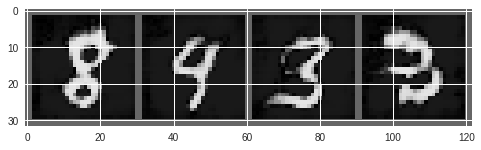

In [11]:
a = torch.randn(100)
a = a.cuda()
b = gen(a)
b= b.cpu()
imshow(torchvision.utils.make_grid(b))

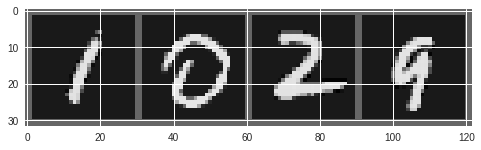

In [16]:
a = torch.randn(100)
a = a.cuda()
b = gen(a)
b= b.cpu()
imshow(torchvision.utils.make_grid(images))

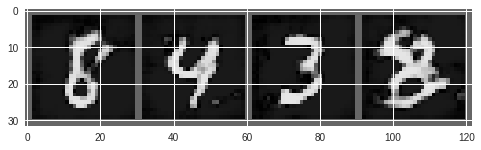

In [17]:
a = torch.randn(100)
a = a.cuda()
b = gen(a)
b= b.cpu()
imshow(torchvision.utils.make_grid(b))

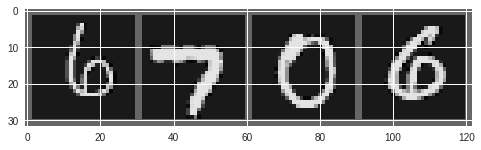

In [18]:
imshow(torchvision.utils.make_grid(real_images.cpu()))

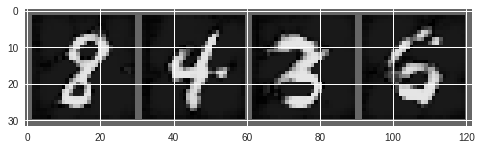

In [20]:
a = torch.randn(100)
a = a.cuda()
b = gen(a)
b= b.cpu()
imshow(torchvision.utils.make_grid(b))